In [23]:
from transformers import SegformerFeatureExtractor, SegformerForSemanticSegmentation
from PIL import Image
import requests
import numpy as np

feature_extractor = SegformerFeatureExtractor.from_pretrained("nvidia/segformer-b0-finetuned-ade-512-512")
model = SegformerForSemanticSegmentation.from_pretrained("nvidia/segformer-b0-finetuned-ade-512-512")

# url = "http://images.cocodataset.org/val2017/000000039769.jpg"
# image = Image.open(requests.get(url, stream=True).raw)

In [72]:
image = Image.open("bird_dataset/test_images/mistery_category/fa3db38c68c70898714a17ca83774158.jpg")

In [73]:
inputs = feature_extractor(images=image, return_tensors="pt")
outputs = model(**inputs)
logits = outputs.logits  


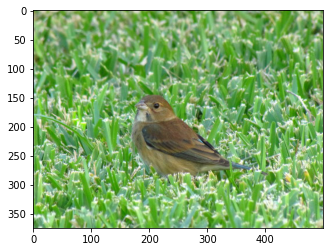

In [74]:
# plot the input 
import matplotlib.pyplot as plt
plt.imshow(np.array(image))
plt.show()

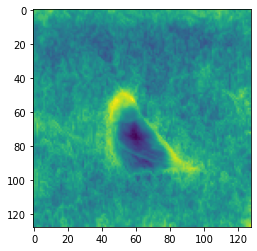

In [75]:
# print(inputs.shape)
plt.imshow(outputs.logits[0, 12,...].to('cpu').detach().numpy())
plt.show()

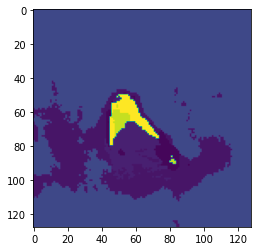

In [76]:
# print(inputs.shape)
plt.imshow(outputs.logits.argmax(1)[0].to('cpu').numpy()/149.)
plt.show()

In [78]:
outputs.logits.argmax(1)[0][80, 60]

tensor(13)